<a href="https://colab.research.google.com/github/npr99/PlanningMethods/blob/master/PLAN604_Explore_Population_Projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explore population projections

The Texas Demographic Center provides state and county level population projections (2010 to 2050) using the  Cohort Component projection technique.

Assumptions mentioned in methodology report:
1. county's future fertility would follow the state trend
2. the race/ethnicity of newborns is the same as their mother
3. mortality rates remain at the ratios to national rates for 2010
4. used the 2010-2015 migration rates
5. recent trends remain stable and continue into the future


The Texas Demographic Center. (2018) Projections of the Population of Texas and Counties in Texas by Age, Sex, and Race/Ethnicity for 2010-2050. Produced by  The University of Texas at San Antonio. Available at https://demographics.texas.gov/Data/TPEPP/Projections/Index

In [1]:
# use wget command to read in data
!wget https://demographics.texas.gov/Resources/TPEPP/Projections/2018/2018allcntytot.zip

--2021-10-18 19:31:41--  https://demographics.texas.gov/Resources/TPEPP/Projections/2018/2018allcntytot.zip
Resolving demographics.texas.gov (demographics.texas.gov)... 129.115.142.240
Connecting to demographics.texas.gov (demographics.texas.gov)|129.115.142.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 398288 (389K) [application/x-zip-compressed]
Saving to: ‘2018allcntytot.zip’

2018allcntytot.zip  100%[===================>] 388.95K   561KB/s    in 0.7s    

2021-10-18 19:31:42 (561 KB/s) - ‘2018allcntytot.zip’ saved [398288/398288]



In [2]:
# use unzip command to unzip data
!unzip 2018allcntytot.zip

Archive:  2018allcntytot.zip
  inflating: 2018allcntytot.csv      


In [3]:
# use pandas library to read csv file
import pandas as pd # For reading, writing and wrangling data

dataframe = pd.read_csv('2018allcntytot.csv')
dataframe.head(5)

,year,FIPS,area_name,total,total_male,total_female,nh_white_total,nh_white_male,nh_white_female,nh_black_total,nh_black_male,nh_black_female,hispanic_total,hispanic_male,hispanic_female,nh_asian_total,nh_asian_male,nh_asian_female,nh_other_total,nh_other_male,nh_other_female
0,2010,0,State of Texas,25145561,12472280,12673281,11397345,5632646,5764699,2886825,1392410,1494415,9460921,4763753,4697168,948426,460855,487571,452044,222616,229428
1,2011,0,State of Texas,25567291,12684177,12883114,11473189,5672925,5800264,2948232,1422595,1525637,9681249,4873297,4807952,995813,484336,511477,468808,231024,237784
2,2012,0,State of Texas,25996722,12899473,13097249,11548679,5712731,5835948,3011317,1453567,1557750,9905223,4984546,4920677,1045280,508836,536444,486223,239793,246430
3,2013,0,State of Texas,26433242,13118331,13314911,11624174,5752529,5871645,3075723,1485314,1590409,10132148,5097205,5034943,1096888,534427,562461,504309,248856,255453
4,2014,0,State of Texas,26876429,13340220,13536209,11699326,5791913,5907413,3141271,1517572,1623699,10361956,5211270,5150686,1150724,561173,589551,523152,258292,264860


In [4]:
# file contains data for all 254 counties in Texas
# select data for one area
texas = dataframe.loc[dataframe['area_name']=='State of Texas']
texas

,year,FIPS,area_name,total,total_male,total_female,nh_white_total,nh_white_male,nh_white_female,nh_black_total,nh_black_male,nh_black_female,hispanic_total,hispanic_male,hispanic_female,nh_asian_total,nh_asian_male,nh_asian_female,nh_other_total,nh_other_male,nh_other_female
0,2010,0,State of Texas,25145561,12472280,12673281,11397345,5632646,5764699,2886825,1392410,1494415,9460921,4763753,4697168,948426,460855,487571,452044,222616,229428
1,2011,0,State of Texas,25567291,12684177,12883114,11473189,5672925,5800264,2948232,1422595,1525637,9681249,4873297,4807952,995813,484336,511477,468808,231024,237784
2,2012,0,State of Texas,25996722,12899473,13097249,11548679,5712731,5835948,3011317,1453567,1557750,9905223,4984546,4920677,1045280,508836,536444,486223,239793,246430
3,2013,0,State of Texas,26433242,13118331,13314911,11624174,5752529,5871645,3075723,1485314,1590409,10132148,5097205,5034943,1096888,534427,562461,504309,248856,255453
4,2014,0,State of Texas,26876429,13340220,13536209,11699326,5791913,5907413,3141271,1517572,1623699,10361956,5211270,5150686,1150724,561173,589551,523152,258292,264860
5,2015,0,State of Texas,27326193,13565260,13760933,11773981,5830835,5943146,3207833,1550340,1657493,10594952,5326926,5268026,1206752,589028,617724,542675,268131,274544
6,2016,0,State of Texas,27782691,13793511,13989180,11848133,5869436,5978697,3275849,1583850,1691999,10830665,5443891,5386774,1265200,618093,647107,562844,278241,284603
7,2017,0,State of Texas,28245982,14025161,14220821,11921715,5907612,6014103,3344849,1617874,1726975,11069430,5562384,5507046,1326199,648486,677713,583789,288805,294984
8,2018,0,State of Texas,28716123,14260029,14456094,11994710,5945389,6049321,3414806,1652363,1762443,11311352,5682415,5628937,1389858,680246,709612,605397,299616,305781
9,2019,0,State of Texas,29193268,14498295,14694973,12066910,5982711,6084199,3485870,1687455,1798415,11556382,5803888,5752494,1456220,713276,742944,627886,310965,316921


In [5]:
# use matplotlib to make scatter plot
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

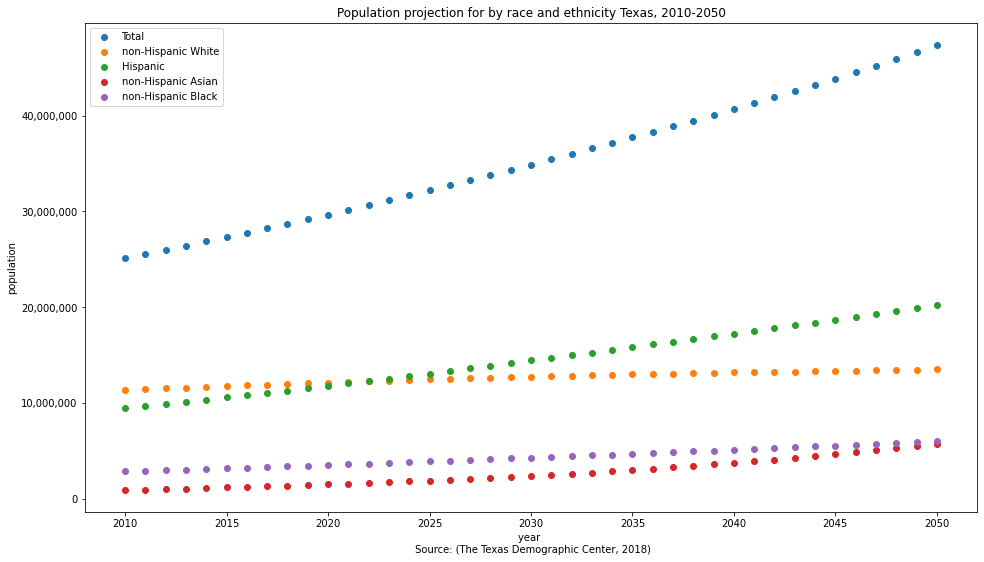

In [9]:
# Scatter Plot
figure_1 = plt.figure()
plt.figure(figsize=(16 ,9))
plt.scatter(texas['year'], texas['total'], label = 'Total')
plt.scatter(texas['year'], texas['nh_white_total'], 
            label = 'non-Hispanic White')
plt.scatter(texas['year'], texas['hispanic_total'], 
            label = 'Hispanic')
plt.scatter(texas['year'], texas['nh_asian_total'], 
            label = 'non-Hispanic Asian')
plt.scatter(texas['year'], texas['nh_black_total'], 
            label = 'non-Hispanic Black')
plt.title('Population projection for by race and ethnicity Texas, 2010-2050')
plt.xlabel('year \n Source: (The Texas Demographic Center, 2018)')
plt.ylabel('population')
plt.legend(loc='upper left')
from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.savefig('PLAN604 Explore Population Projections Figure1.jpg', dpi=600)

In [7]:
# foramt y axis labels - to show full number with commas
# help from google search
# https://stackoverflow.com/questions/29188757/matplotlib-specify-format-of-floats-for-tick-labels

# Explore data for one county

In [10]:
# file contains data for all 254 counties in Texas
# select data for one area
county = dataframe.loc[dataframe['area_name']=='Brazos County']
county.tail()

,year,FIPS,area_name,total,total_male,total_female,nh_white_total,nh_white_male,nh_white_female,nh_black_total,nh_black_male,nh_black_female,hispanic_total,hispanic_male,hispanic_female,nh_asian_total,nh_asian_male,nh_asian_female,nh_other_total,nh_other_male,nh_other_female
897,2046,41,Brazos County,347475,176294,171181,145183,74369,70814,34053,16833,17220,123240,60650,62590,30734,17736,12998,14265,6706,7559
898,2047,41,Brazos County,352028,178569,173459,145565,74610,70955,34276,16953,17323,125989,61927,64062,31432,18141,13291,14766,6938,7828
899,2048,41,Brazos County,356595,180864,175731,145940,74857,71083,34492,17073,17419,128747,63207,65540,32123,18542,13581,15293,7185,8108
900,2049,41,Brazos County,361191,183182,178009,146320,75107,71213,34694,17186,17508,131520,64495,67025,32838,18962,13876,15819,7432,8387
901,2050,41,Brazos County,365863,185528,180335,146727,75370,71357,34894,17299,17595,134323,65797,68526,33556,19372,14184,16363,7690,8673


<Figure size 432x288 with 0 Axes>

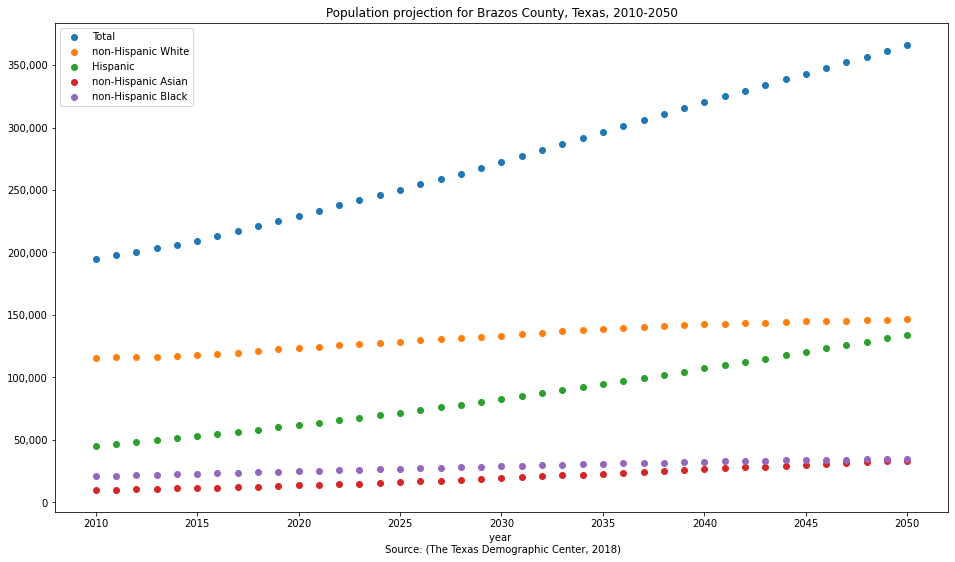

In [12]:
# Scatter Plot
figure_2 = plt.figure()
plt.figure(figsize=(16,9))
plt.scatter(county['year'], county['total'], label = 'Total')
plt.scatter(county['year'], county['nh_white_total'], 
            label = 'non-Hispanic White')
plt.scatter(county['year'], county['hispanic_total'], 
            label = 'Hispanic')
plt.scatter(county['year'], county['nh_asian_total'], 
            label = 'non-Hispanic Asian')
plt.scatter(county['year'], county['nh_black_total'], 
            label = 'non-Hispanic Black')
plt.title('Population projection for Brazos County, Texas, 2010-2050')
plt.xlabel('year')
plt.xlabel('year \n Source: (The Texas Demographic Center, 2018)')
plt.legend(loc='upper left')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
plt.savefig('PLAN604 Explore Population Projections Figure2.jpg', dpi=600)